In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')
sub=pd.read_csv('./titanic/gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [6]:
# data preprocessing & feature engineering 

full_data = [train, test]

for dataset in full_data:
    
    dataset['Ticket_type'] = dataset['Ticket'].apply(lambda x: x[0:3])
    dataset['Ticket_type'] = dataset['Ticket_type'].astype('category')
    dataset['Ticket_type'] = dataset['Ticket_type'].cat.codes
    
    dataset['Words_Count'] = dataset['Name'].apply(lambda x: len(x.split()))
    
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
    
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
    dataset['Title'] = dataset['Name'].apply(get_title)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int) # mapping sex
    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 

C:\Users\Milad\AppData\Local\Temp/ipykernel_23548/3060123638.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
C:\Users\Milad\AppData\Local\Temp/ipykernel_23548/3060123638.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [7]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [8]:
train.tail()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Ticket_type,Words_Count,Has_Cabin,FamilySize,IsAlone,Title
886,0,2,1,1,0,1,0,23,3,0,1,1,5
887,1,1,0,1,0,2,0,2,4,1,1,1,2
888,0,3,0,1,2,2,0,150,5,0,4,0,2
889,1,1,1,1,0,2,1,1,4,1,1,1,1
890,0,3,1,1,0,0,2,94,3,0,1,1,1


In [9]:
test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Ticket_type,Words_Count,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,0,2,58,3,0,1,1,1
1,3,0,2,0,0,0,71,5,0,2,0,3
2,2,1,3,0,1,2,32,4,0,1,1,1
3,3,1,1,0,1,0,55,3,0,1,1,1
4,3,0,1,1,1,0,54,6,0,3,0,3


In [10]:
X=train.drop("Survived",axis=1).values
y=train["Survived"].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_scaled=scaler.transform(test)

In [15]:
# Creating the Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [16]:
model = Sequential()
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1,activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
#Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.
model.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          batch_size=100,
          validation_data=(X_test, y_test), 
          )

Epoch 1/1000
9/9 [==============================] - 1s 18ms/step - loss: 0.6690 - val_loss: 0.6609
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6293 - val_loss: 0.6377
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5905 - val_loss: 0.6072
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5548 - val_loss: 0.5710
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5273 - val_loss: 0.5210
Epoch 6/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5123 - val_loss: 0.4689
Epoch 7/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5130 - val_loss: 0.4586
Epoch 8/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4865 - val_loss: 0.4545
Epoch 9/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4846 - val_loss: 0.4432
Epoch 10/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4675 - val_loss: 0.4631
Epoch 11/1000
9/9 

9/9 [==============================] - 0s 3ms/step - loss: 0.3626 - val_loss: 0.3813
Epoch 84/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3747 - val_loss: 0.3793
Epoch 85/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3638 - val_loss: 0.3904
Epoch 86/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3731 - val_loss: 0.3970
Epoch 87/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3681 - val_loss: 0.3871
Epoch 88/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3579 - val_loss: 0.3858
Epoch 89/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3690 - val_loss: 0.3728
Epoch 90/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3621 - val_loss: 0.3857
Epoch 91/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3764 - val_loss: 0.3930
Epoch 92/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3553 - val_loss: 0.3858
Epoch 93/1000
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.3181 - val_loss: 0.3827
Epoch 166/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3278 - val_loss: 0.3746
Epoch 167/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3271 - val_loss: 0.3769
Epoch 168/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3290 - val_loss: 0.3805
Epoch 169/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3268 - val_loss: 0.3634
Epoch 170/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3085 - val_loss: 0.3684
Epoch 171/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3196 - val_loss: 0.3693
Epoch 172/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3371 - val_loss: 0.3646
Epoch 173/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3256 - val_loss: 0.3609
Epoch 174/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3106 - val_loss: 0.3609
Epoch 175/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.2904 - val_loss: 0.3557
Epoch 248/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2925 - val_loss: 0.3640
Epoch 249/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3106 - val_loss: 0.3769
Epoch 250/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2881 - val_loss: 0.4048
Epoch 251/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3015 - val_loss: 0.4075
Epoch 252/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3002 - val_loss: 0.3932
Epoch 253/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2997 - val_loss: 0.3716
Epoch 254/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2887 - val_loss: 0.4017
Epoch 255/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2897 - val_loss: 0.3934
Epoch 256/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2938 - val_loss: 0.4028
Epoch 257/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.2898 - val_loss: 0.3736
Epoch 330/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2800 - val_loss: 0.3804
Epoch 331/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2811 - val_loss: 0.4085
Epoch 332/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2727 - val_loss: 0.4129
Epoch 333/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2737 - val_loss: 0.4074
Epoch 334/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2796 - val_loss: 0.3996
Epoch 335/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2756 - val_loss: 0.4476
Epoch 336/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2779 - val_loss: 0.4503
Epoch 337/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2841 - val_loss: 0.4431
Epoch 338/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2653 - val_loss: 0.4340
Epoch 339/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.2545 - val_loss: 0.4877
Epoch 412/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2529 - val_loss: 0.4839
Epoch 413/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2613 - val_loss: 0.4943
Epoch 414/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2419 - val_loss: 0.4405
Epoch 415/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2613 - val_loss: 0.4417
Epoch 416/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2524 - val_loss: 0.4670
Epoch 417/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2607 - val_loss: 0.4457
Epoch 418/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2497 - val_loss: 0.4338
Epoch 419/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2560 - val_loss: 0.4512
Epoch 420/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2528 - val_loss: 0.4433
Epoch 421/1000


Epoch 493/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2355 - val_loss: 0.5277
Epoch 494/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2363 - val_loss: 0.5659
Epoch 495/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2650 - val_loss: 0.5335
Epoch 496/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2401 - val_loss: 0.5408
Epoch 497/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2318 - val_loss: 0.5251
Epoch 498/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2285 - val_loss: 0.5010
Epoch 499/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2388 - val_loss: 0.4601
Epoch 500/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2457 - val_loss: 0.4568
Epoch 501/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2267 - val_loss: 0.4893
Epoch 502/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2249 - val_loss: 0.5092


Epoch 575/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2328 - val_loss: 0.6106
Epoch 576/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2467 - val_loss: 0.5700
Epoch 577/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2351 - val_loss: 0.6025
Epoch 578/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2237 - val_loss: 0.6275
Epoch 579/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2523 - val_loss: 0.6490
Epoch 580/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2356 - val_loss: 0.5874
Epoch 581/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2383 - val_loss: 0.5778
Epoch 582/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2181 - val_loss: 0.6065
Epoch 583/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2322 - val_loss: 0.6358
Epoch 584/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2227 - val_loss: 0.6587


Epoch 657/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2127 - val_loss: 0.6625
Epoch 658/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2206 - val_loss: 0.5993
Epoch 659/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2137 - val_loss: 0.6470
Epoch 660/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2024 - val_loss: 0.7283
Epoch 661/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2292 - val_loss: 0.6844
Epoch 662/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2141 - val_loss: 0.6444
Epoch 663/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2072 - val_loss: 0.7453
Epoch 664/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2137 - val_loss: 0.6451
Epoch 665/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2241 - val_loss: 0.6381
Epoch 666/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2254 - val_loss: 0.6124


Epoch 739/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2179 - val_loss: 0.6671
Epoch 740/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2037 - val_loss: 0.6898
Epoch 741/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2169 - val_loss: 0.7162
Epoch 742/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1965 - val_loss: 0.7485
Epoch 743/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2074 - val_loss: 0.7713
Epoch 744/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2061 - val_loss: 0.7681
Epoch 745/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2128 - val_loss: 0.7526
Epoch 746/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1879 - val_loss: 0.7640
Epoch 747/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1926 - val_loss: 0.7717
Epoch 748/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2076 - val_loss: 0.7992


Epoch 821/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1917 - val_loss: 0.7202
Epoch 822/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2016 - val_loss: 0.7405
Epoch 823/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2139 - val_loss: 0.7956
Epoch 824/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2024 - val_loss: 0.7377
Epoch 825/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2096 - val_loss: 0.7287
Epoch 826/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1968 - val_loss: 0.7571
Epoch 827/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2109 - val_loss: 0.7520
Epoch 828/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1963 - val_loss: 0.7483
Epoch 829/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1950 - val_loss: 0.7634
Epoch 830/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2015 - val_loss: 0.7625


Epoch 903/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1900 - val_loss: 0.8482
Epoch 904/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1976 - val_loss: 0.8425
Epoch 905/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1947 - val_loss: 0.8521
Epoch 906/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1834 - val_loss: 0.8026
Epoch 907/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1981 - val_loss: 0.7945
Epoch 908/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1785 - val_loss: 0.8149
Epoch 909/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1914 - val_loss: 0.8067
Epoch 910/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1912 - val_loss: 0.8211
Epoch 911/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1904 - val_loss: 0.8547
Epoch 912/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1927 - val_loss: 0.8667


Epoch 985/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1891 - val_loss: 0.8650
Epoch 986/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1801 - val_loss: 0.8318
Epoch 987/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.2032 - val_loss: 0.8256
Epoch 988/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1795 - val_loss: 0.8202
Epoch 989/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1973 - val_loss: 0.8053
Epoch 990/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1781 - val_loss: 0.8303
Epoch 991/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1798 - val_loss: 0.8645
Epoch 992/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2001 - val_loss: 0.8522
Epoch 993/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2133 - val_loss: 0.8223
Epoch 994/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1836 - val_loss: 0.7975


<AxesSubplot:>

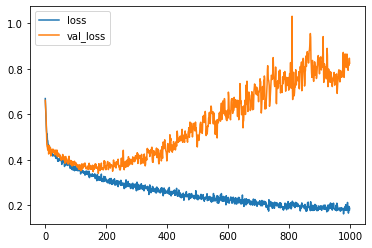

In [18]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        24
           1       0.76      0.62      0.68        21

    accuracy                           0.73        45
   macro avg       0.74      0.73      0.73        45
weighted avg       0.74      0.73      0.73        45



In [20]:
confusion_matrix(y_test,predictions)

array([[20,  4],
       [ 8, 13]], dtype=int64)

In [21]:
sub['Survived']=(model.predict(test) > 0.5).astype("int32")

In [22]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [23]:
sub.to_csv('submission_first.csv', index=False)

In [24]:
# input/target value specification
y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values 

In [26]:
# random forest model
# Remember this is going to take a while! I have run this code block and the optimized parameters are found in the next cell.
# Feel free to run the next two cells.



# training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'bootstrap': bootstrap}
rf = RandomForestClassifier() #n_estimators = 1000, random_state = 42
model = GridSearchCV(estimator = rf, param_grid = grid, cv = 3, verbose=1,scoring="accuracy", n_jobs = -1)
model.fit(x_train, y_train)






Fitting 3 folds for each of 5760 candidates, totalling 17280 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             scoring='accuracy', verbose=1)

In [29]:
# due to the large time for training it is better to save the model or use this best model here:
print(model.best_params_)


{'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [33]:
# the optimized model:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='gini',
                            n_estimators=200,
                            max_depth=10,
                            min_samples_split=5,
                            min_samples_leaf=2,
                            max_features='auto',
                            oob_score=True,
                            random_state=0,
                            bootstrap= True,
                            n_jobs=-1,
                            verbose=1)
model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=1)

In [34]:
sub['Survived']=model.predict(x_test)
sub

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [35]:
sub.to_csv('submission_second.csv', index=False)